# Music Generation RNN
This jupyter notebook covers the whole data pipeline and goes through multiple experiments to reflect on our achievements and learnings during the development process.

## Setup
This section installs and imports the required libraries.

In [5]:
!pip install pretty-midi
!sudo apt install -y fluidsynth
!pip install --upgrade pyfluidsynth
;

In [9]:
import pandas as pd
import numpy as np
import tensorflow as tf
import src.models.basic_rnn
import src.utils.visualization
import imp
imp.reload(src.models.basic_rnn)
imp.reload(src.utils.visualization)
import src.models.basic_rnn as brnn
from src.utils.visualization import plot_piano_roll, plot_histories
from IPython.display import Image

# Best Results

The progression of our models are shown below in various experiments studies. We start off by highlighting some of our best output

# Overview of what is changing between experiments

## Input data

### Timing
Midi files can be processes in a number of ways. Midi files contain high fidelity information about what notes For our experiments we take the input and process it into 4/4 time. This means checking the midi file if each note is being play during the 16 beats per bar

1. Processing just the notes held
2. Notes held and articulation

### Model
How many different LSTM layers do we need?
1. 2 LSTM layers with X number of nodes
2. Trying model with 4 Nodes
3. Try GRU???

### Multi Input / Multi Output Considerations
1. Tried inputing all notes in, all notes out
2. Tried Note invariance where all notes are input across the batch direction

### Batch size
1. Small batch size
2. Large batch size

### Loss Types
1. RMSE
2. Categorical Cross Entropy

### Layer Activations
1. Sigmoid as we want to force binomial 
2. RELU and playing the top X notes??


### Predicting Notes
1. Inputing a single beat at a time
2. Inputing 3 beats and predicting the 4th
3. Inputing 15 beats and predicting the 16th
4. Inputing 31 beats and predicting the 32nd



## Experiments
Our data pre-processing is handled by the different experiment classes as some of them require differ inputs which we have continuosly improved during our research and development. 

### Experiment 1 - Tensorflow Tutorial
The modle provided by the Tensorflow tutorial is very different from the other models and the model in the paper by Daniel Johnson because it does not use the a beat-wise structure. Instead it utilizes the time stamps of each note. While this simplifies the data processing, the generated music is not very complex. Link to model: https://www.tensorflow.org/tutorials/audio/music_generation

- Input: The data is in a dictonary of the form \["pitch", "step", "duration"\]
- Model: 1 LSTM layer (128) and one Dense layer without activation. 
    - Optimizer: Adam
    - Loss: SparseCategoricalLoss
- Output: Predicts pitch, step, and duration at the same time

Experiment 1:
in get_model self is <src.models.basic_rnn.RNNMusicExperimentSix object at 0x7eff081708d0>
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 25, 3)]      0                                            
__________________________________________________________________________________________________
lstm_6 (LSTM)                   (None, 128)          67584       input_3[0][0]                    
__________________________________________________________________________________________________
duration (Dense)                (None, 1)            129         lstm_6[0][0]                     
__________________________________________________________________________________________________
pitch (Dense)                   (None, 128)          16512       lstm_6[0][0]           

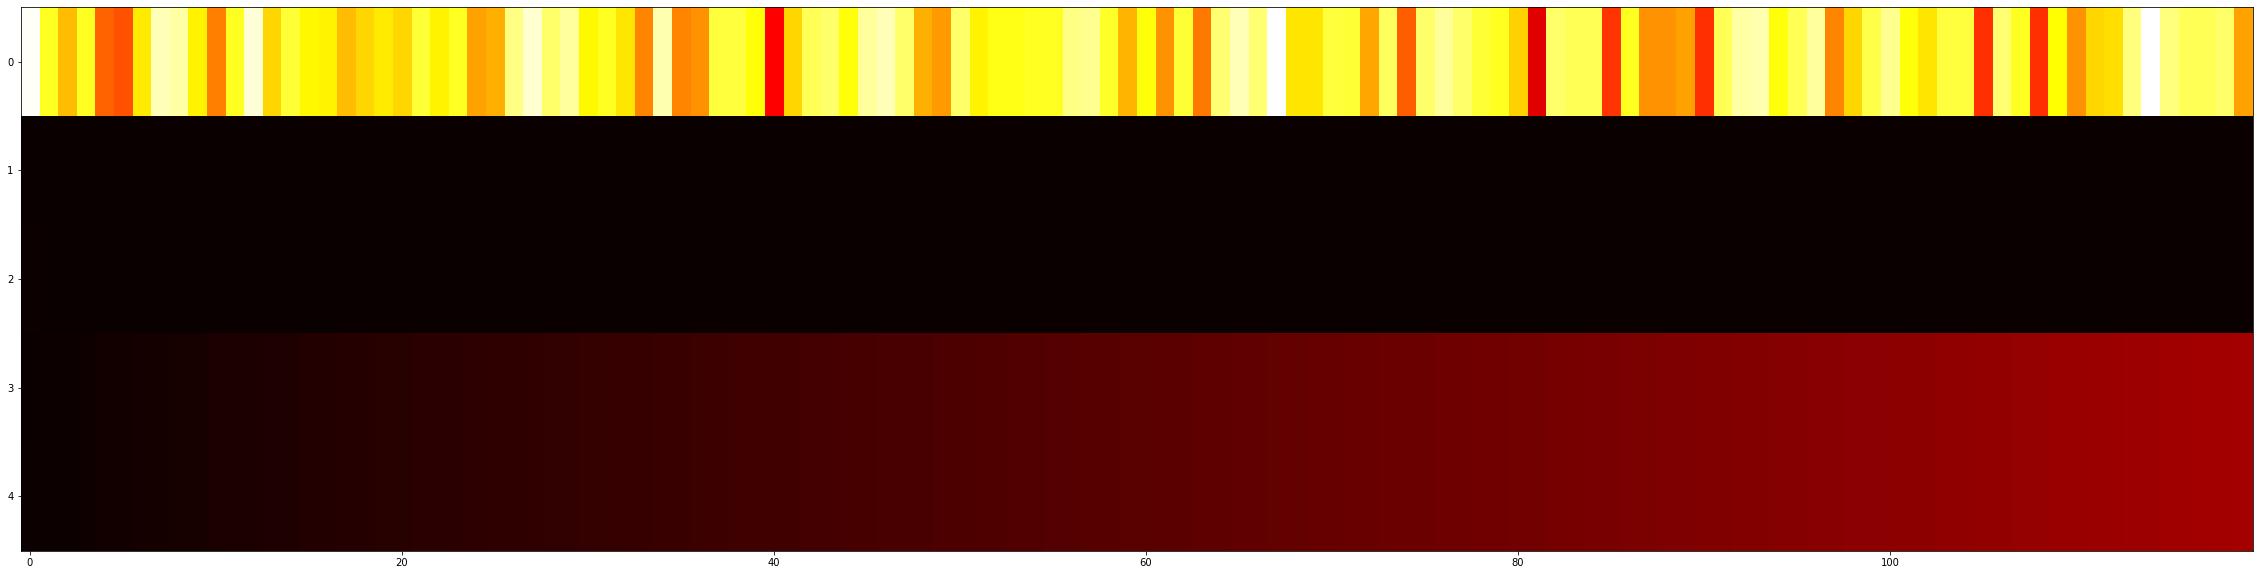

In [7]:
print("Experiment 1:")
exp1 = brnn.RNNMusicExperimentSix(
    learning_rate=0.005,
    epochs=1,
    batch_size=64,
    num_music_files=5,
    sequence_length=25,
)
exp1.run()

In [8]:
#TODO: Fix graph
#TODO: Display Audio

#### Analysis:
# TODO: ADD TEXT

### Experiment 2 - [NAME]
#TODO: Explanation

- Input: The data is in shape (260 x seq_length) - 260 being 128 notes + 128 articulations + 4 beats
- Model: 4 LSTM layers (256) and one Dense layer without relu activation. 
    - Optimizer: Adam
    - Loss: CategoricalCrossEntropy
- Output: Predicts the next timesteps, i.e. which notes are played at the next beat.

In [9]:
print("Experiment 2:")
exp2 = brnn.RNNMusicExperimentOne(
    learning_rate=0.005,
    epochs=10,
    batch_size=64,
    num_music_files=5,
    sequence_length=25,
)
exp2.run()

Experiment 2:
in get model
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 25, 260)]         0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 25, 256)           529408    
_________________________________________________________________
lstm_8 (LSTM)                (None, 25, 256)           525312    
_________________________________________________________________
lstm_9 (LSTM)                (None, 25, 256)           525312    
_________________________________________________________________
lstm_10 (LSTM)               (None, 256)               525312    
_________________________________________________________________
pitch (Dense)                (None, 256)               65792     
Total params: 2,171,136
Trainable params: 2,171,136
Non-trainable params: 0
______________________

ValueError: in user code:

    /home/ecbm4040/envTF24/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:805 train_function  *
        return step_function(self, iterator)
    /home/ecbm4040/envTF24/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/ecbm4040/envTF24/lib/python3.6/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/ecbm4040/envTF24/lib/python3.6/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/ecbm4040/envTF24/lib/python3.6/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/ecbm4040/envTF24/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:788 run_step  **
        outputs = model.train_step(data)
    /home/ecbm4040/envTF24/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:754 train_step
        y_pred = self(x, training=True)
    /home/ecbm4040/envTF24/lib/python3.6/site-packages/tensorflow/python/keras/engine/base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /home/ecbm4040/envTF24/lib/python3.6/site-packages/tensorflow/python/keras/engine/input_spec.py:274 assert_input_compatibility
        ', found shape=' + display_shape(x.shape))

    ValueError: Input 0 is incompatible with layer model_1: expected shape=(None, 25, 260), found shape=(64, 15, 25780)


### Experiment 3 - [NAME]

In [10]:
print("Experiment 3")
exp3 = brnn.RNNMusicExperimentTwo(
    sequence_length=15,
    learning_rate=0.001,
    epochs=1,
)
exp3.run()

Experiment 3


AttributeError: 'list' object has no attribute 'shape'

### Experiment 4 - [NAME]

Experiment 4
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_15 (LSTM)               (None, 128, 50)           15800     
_________________________________________________________________
lstm_16 (LSTM)               (None, 128, 50)           20200     
_________________________________________________________________
lstm_17 (LSTM)               (None, 128, 50)           20200     
_________________________________________________________________
dense_2 (Dense)              (None, 128, 2)            102       
Total params: 56,302
Trainable params: 56,302
Non-trainable params: 0
_________________________________________________________________
Training...
1823/1823 [==============================] - 22s 11ms/step - loss: 0.0843 - mse: 0.0203
Predicting data...
Saving data...


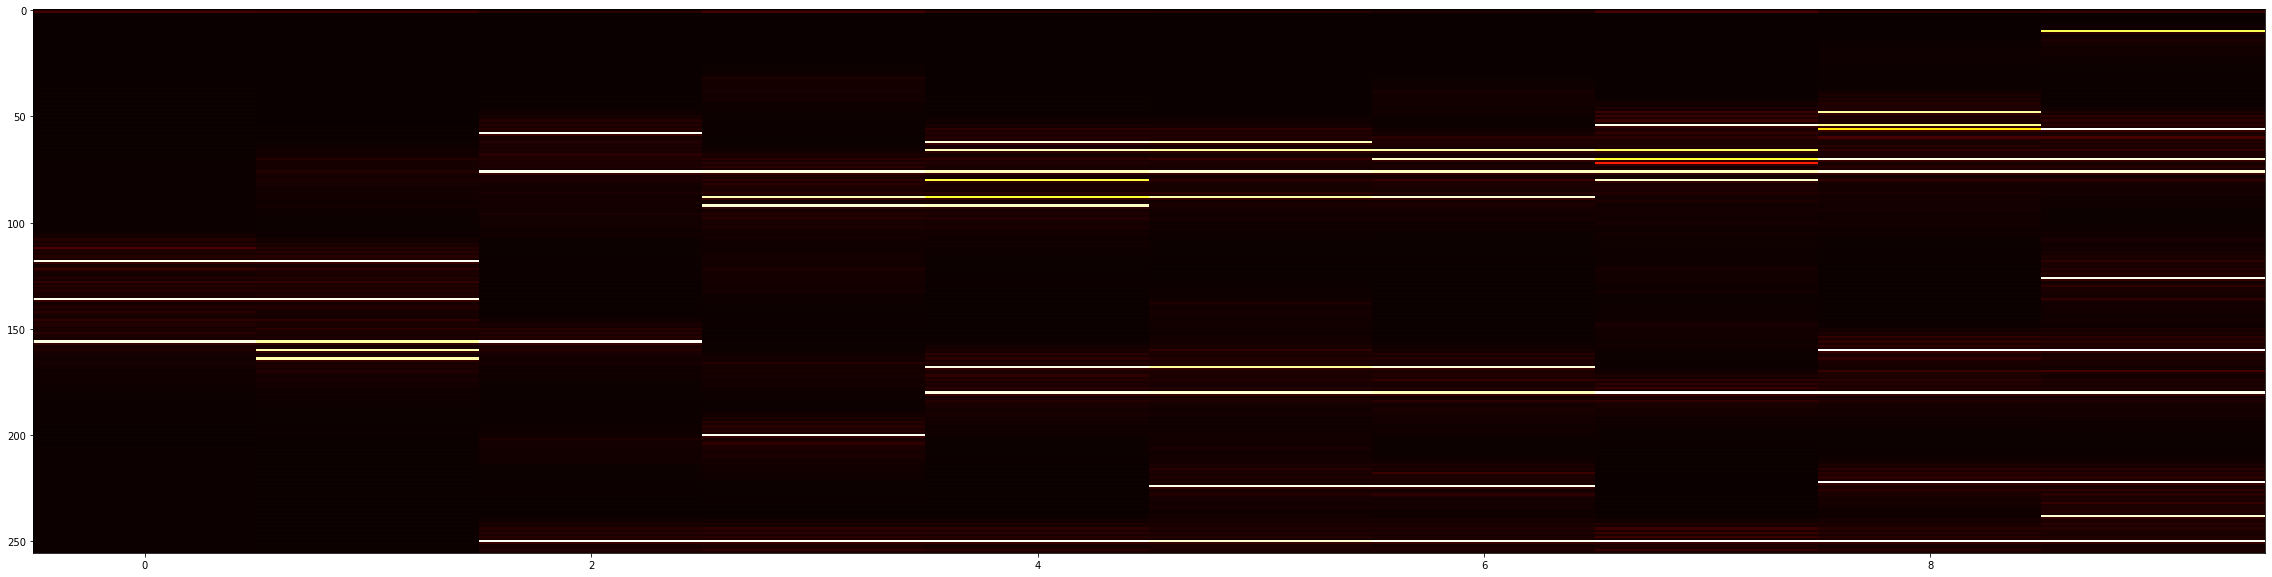

In [11]:
print("Experiment 4")
exp4 = brnn.RNNMusicExperimentThree(
    sequence_length=15,
    learning_rate=0.001,
    epochs=1,
    batch_size=1,
    num_music_files=1,
)
exp4.run()

### Experiment 5 - Study on Batch Size

This is a note invariant model
- Trained using one song
- All 128 notes are input across the batch dimension
- The song time dimension is input into the LSTM tiime dimension

We found that training with a larger batch size results in the model not properly learning


This makes sense because we are inputing different piano notes across the batch dimension. If we group many notes together the patterns dissapear and get entangled. For example, training using information from C and the adjacent C# note would suggest that C and C# would be played together. However, we know from music theory that playing to directly adjacent notes are not complementary. In fact this is refered to dissenant notes and results in bad sounding song.

## Experiment: Affect of predicting using more or less beats in time

This is a note invariant model
- Trained using one song
- All 128 notes are input across the batch dimension
- The song time dimension is input into the LSTM tiime dimension

In [11]:
 print("Trying Exp 5")
exp = brnn.RNNMusicExperimentFive(
    learning_rate=0.01,
    epochs=3,
    batch_size=1,
    num_music_files=1)
exp.run()

print("Exp 5 predicting with 31 beats")
exp.common_config["num_beats_for_prediction"] = 31
exp.predict_and_save_data("_31beats_")

print("Exp 5 predicting with 15 beats")
exp.common_config["num_beats_for_prediction"] = 15
exp.predict_and_save_data("_15beats_")

print("Exp 5 predicting with 3 beats")
exp.common_config["num_beats_for_prediction"] = 3
exp.predict_and_save_data("_3beats_")

Trying Exp 5
in get_model self is <src.models.basic_rnn.RNNMusicExperimentFive object at 0x7f47d0470668>
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_15 (LSTM)               (None, 128, 50)           20800     
_________________________________________________________________
lstm_16 (LSTM)               (None, 128, 50)           20200     
_________________________________________________________________
lstm_17 (LSTM)               (None, 128, 50)           20200     
_________________________________________________________________
dense_5 (Dense)              (None, 128, 2)            102       
Total params: 61,302
Trainable params: 61,302
Non-trainable params: 0
_________________________________________________________________


/home/ecbm4040/envTF24/lib/python3.6/site-packages/pretty_midi/pretty_midi.py:101: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  RuntimeWarning)


Training...
Epoch 1/3
1206/1206 [==============================] - 15s 10ms/step - loss: 0.0680 - mse: 0.0157
Epoch 2/3
1206/1206 [==============================] - 12s 10ms/step - loss: 0.0419 - mse: 0.0106
Epoch 3/3
1206/1206 [==============================] - 12s 10ms/step - loss: 0.0390 - mse: 0.0098
Predicting data...
Saving data...
Exp 5 predicting with 31 beats
Predicting data...
Saving data...
Exp 5 predicting with 15 beats
Predicting data...
Saving data...
Exp 5 predicting with 3 beats
Predicting data...
Saving data...


## Analysis of number of beats used for prediction

The understanding of performance difference for using a different number of beats is best heard rather than seen. The differences in results can be heard at this YOUTUBE_LINK

However the plots below show some insight. The plots show using (1 neat, 3 beats, 15 beats, and 31 beats) in that order. It can be seen that the single beat appears to be the most random. This is also heard in the respective audio files. This makes sense as the neural network isn't able to retain useful musical memory in it's internal state.

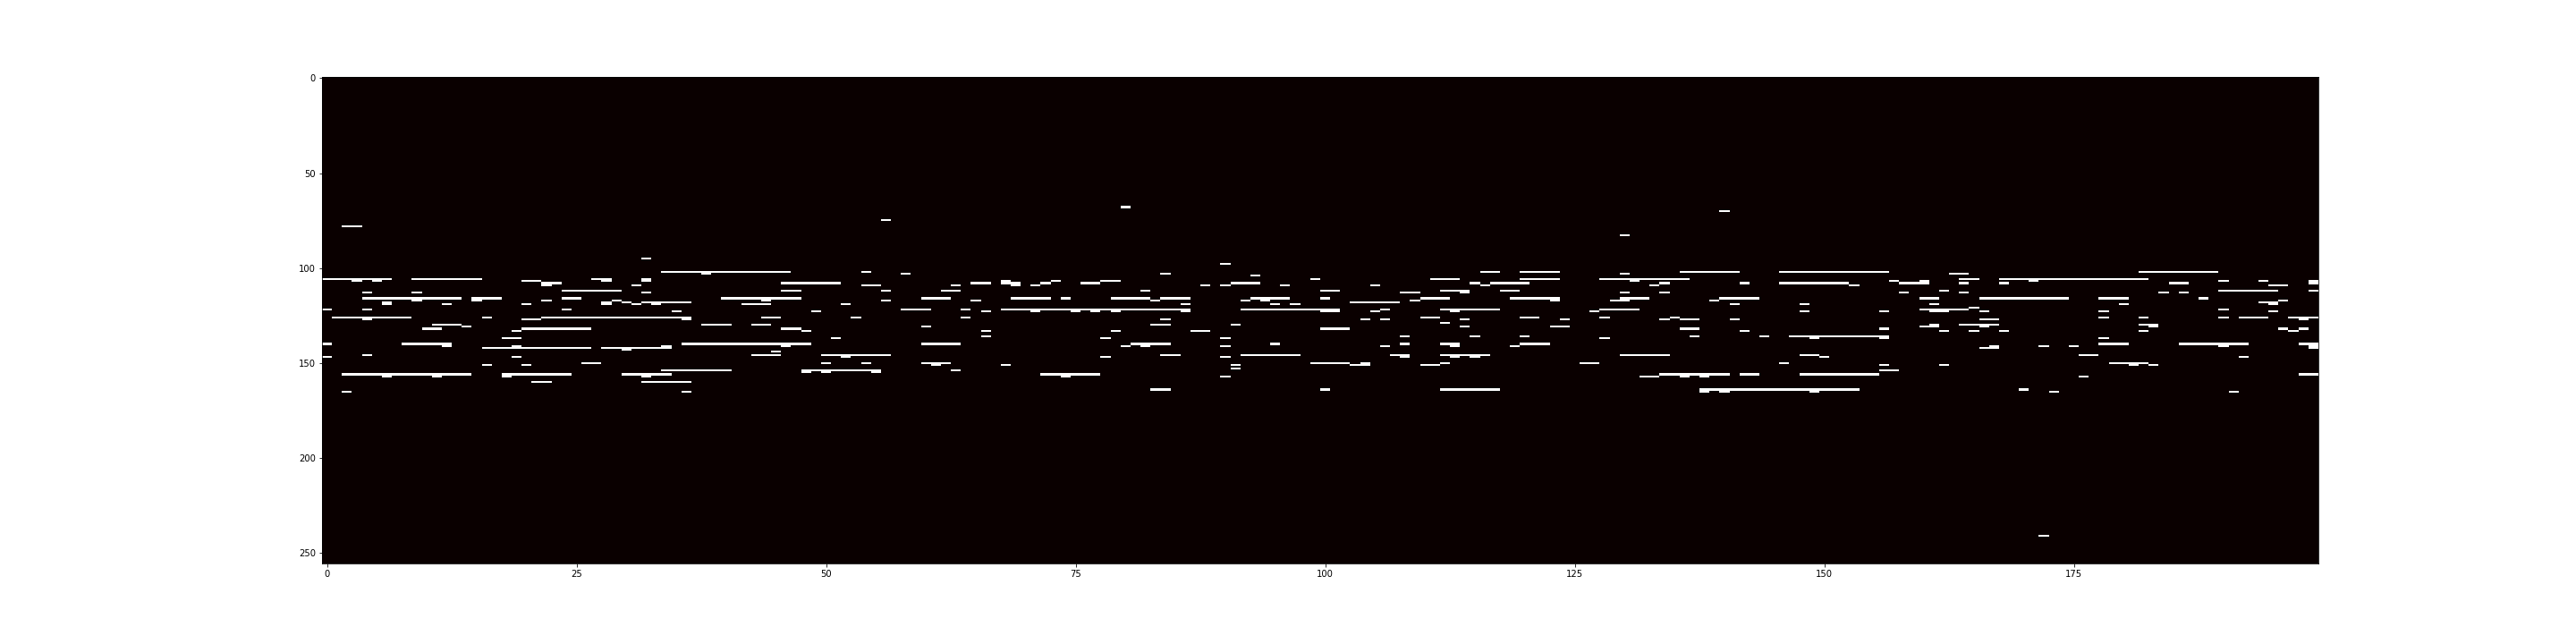

In [13]:
Image("plots/Exp5_both__predicted_15_0dot01_3_1_1_128_1__12-21-2021_17-35-26.png")

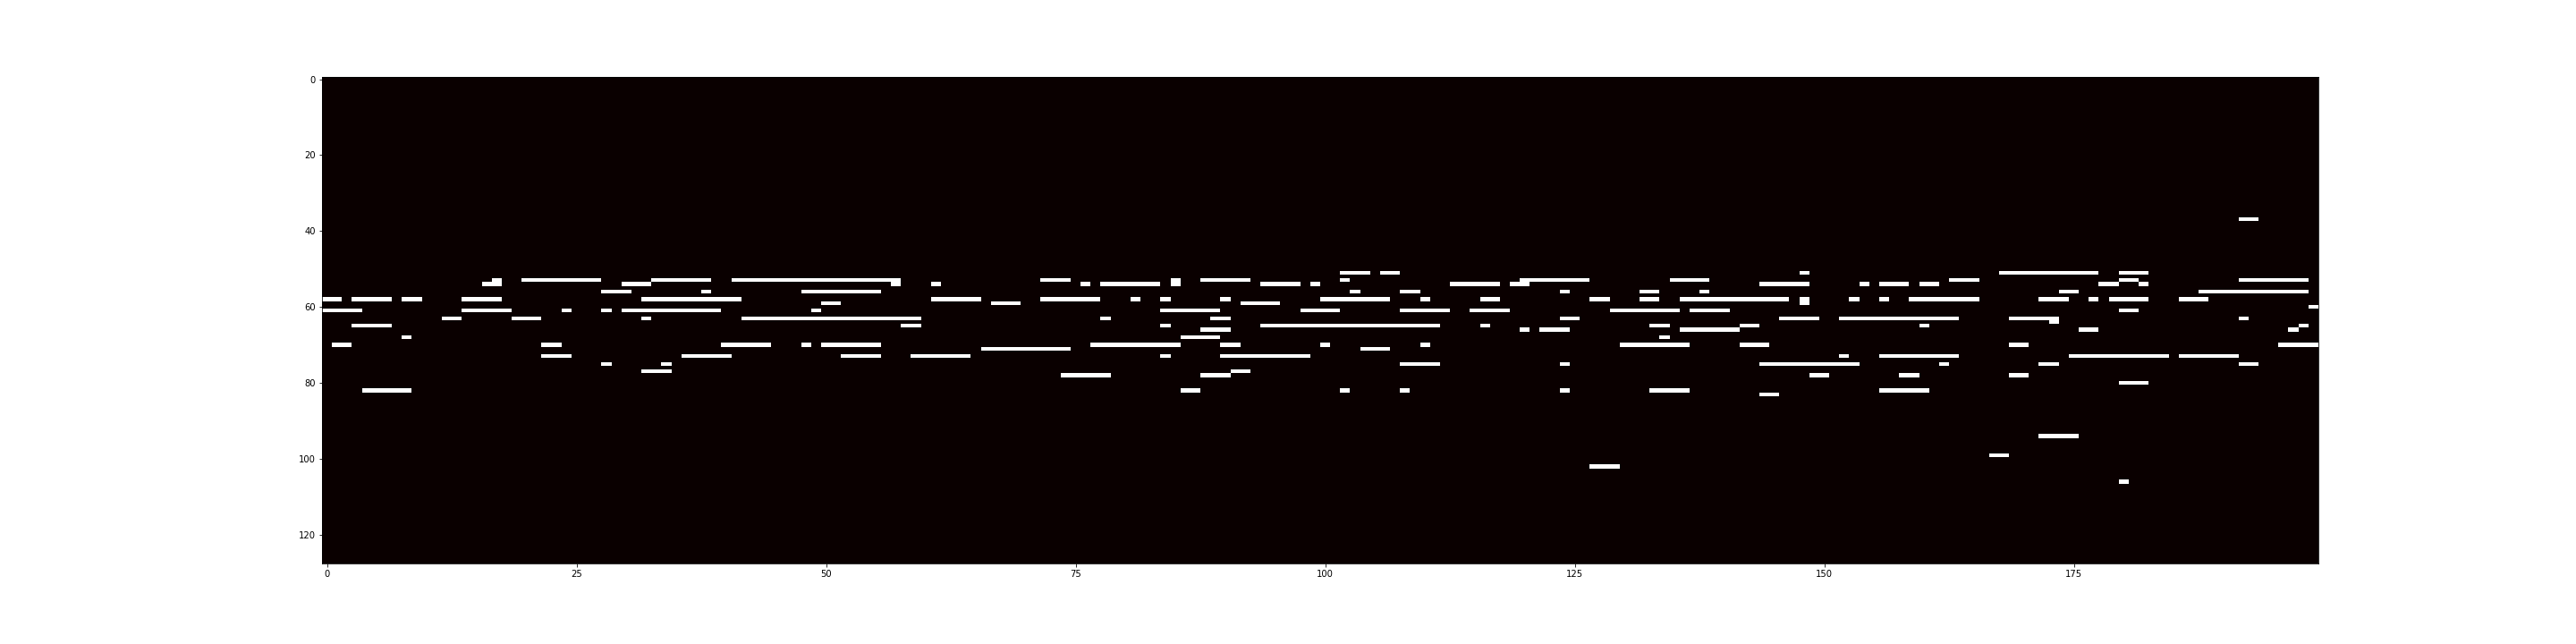

In [15]:
Image("plots/Exp5_note_hold__3beats__predicted_15_0dot01_3_1_1_128_3__12-21-2021_17-36-00.png")

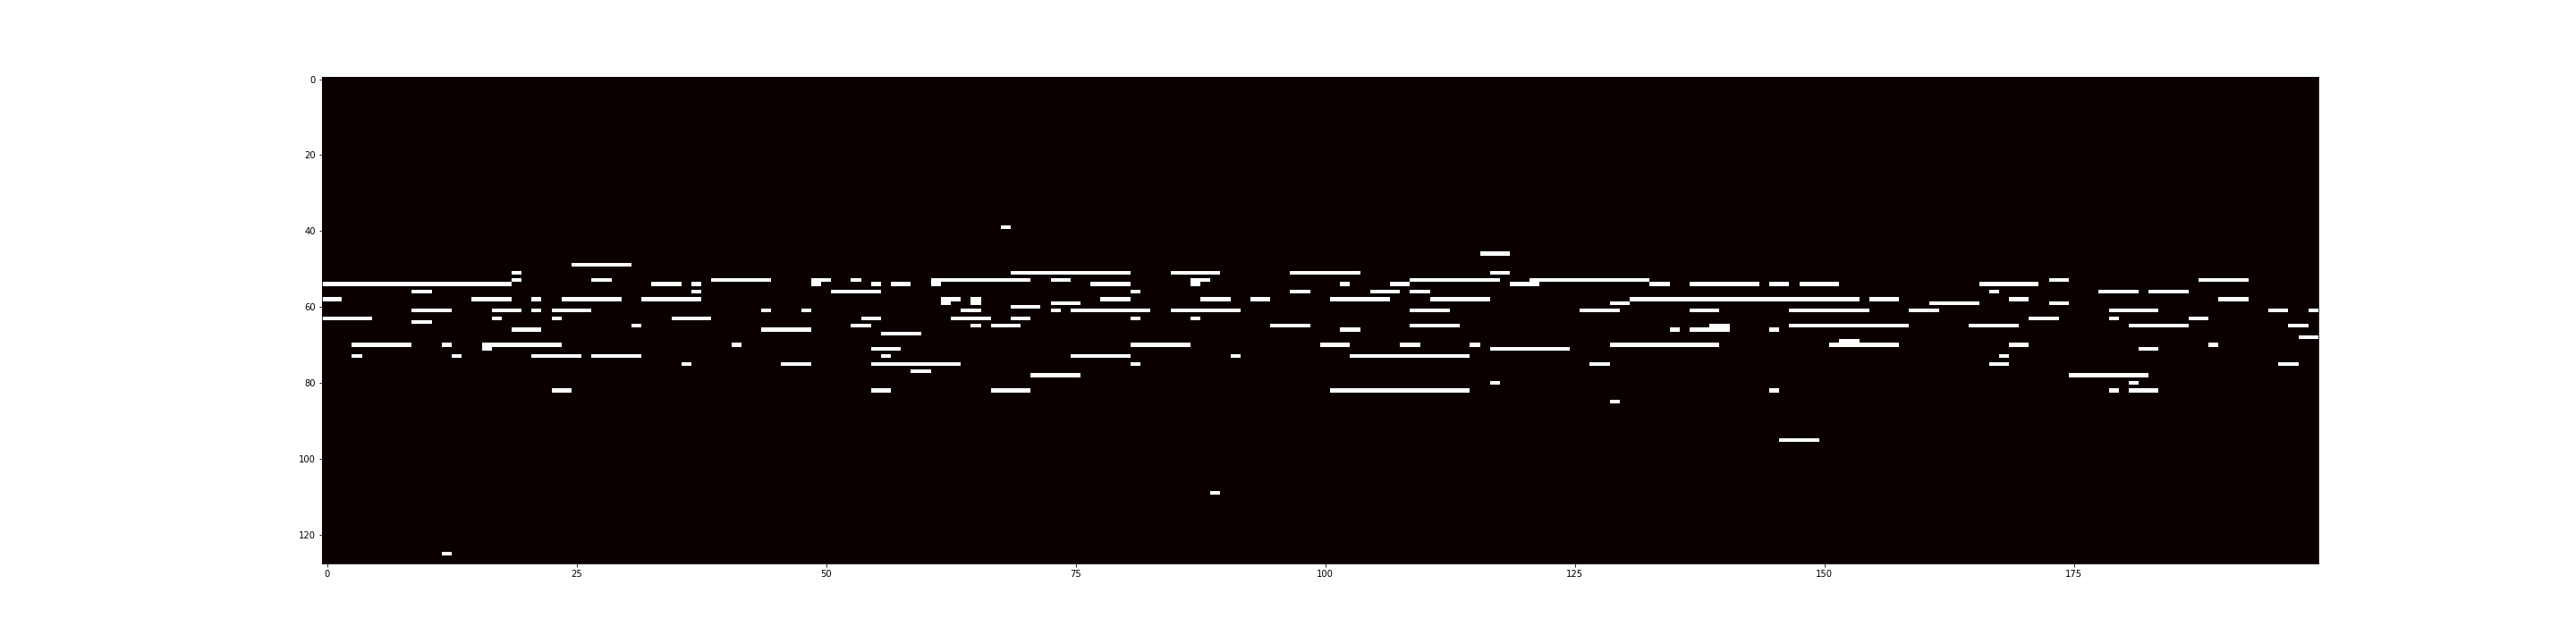

In [16]:
Image("plots/Exp5_note_hold__15beats__predicted_15_0dot01_3_1_1_128_15__12-21-2021_17-35-49.png")

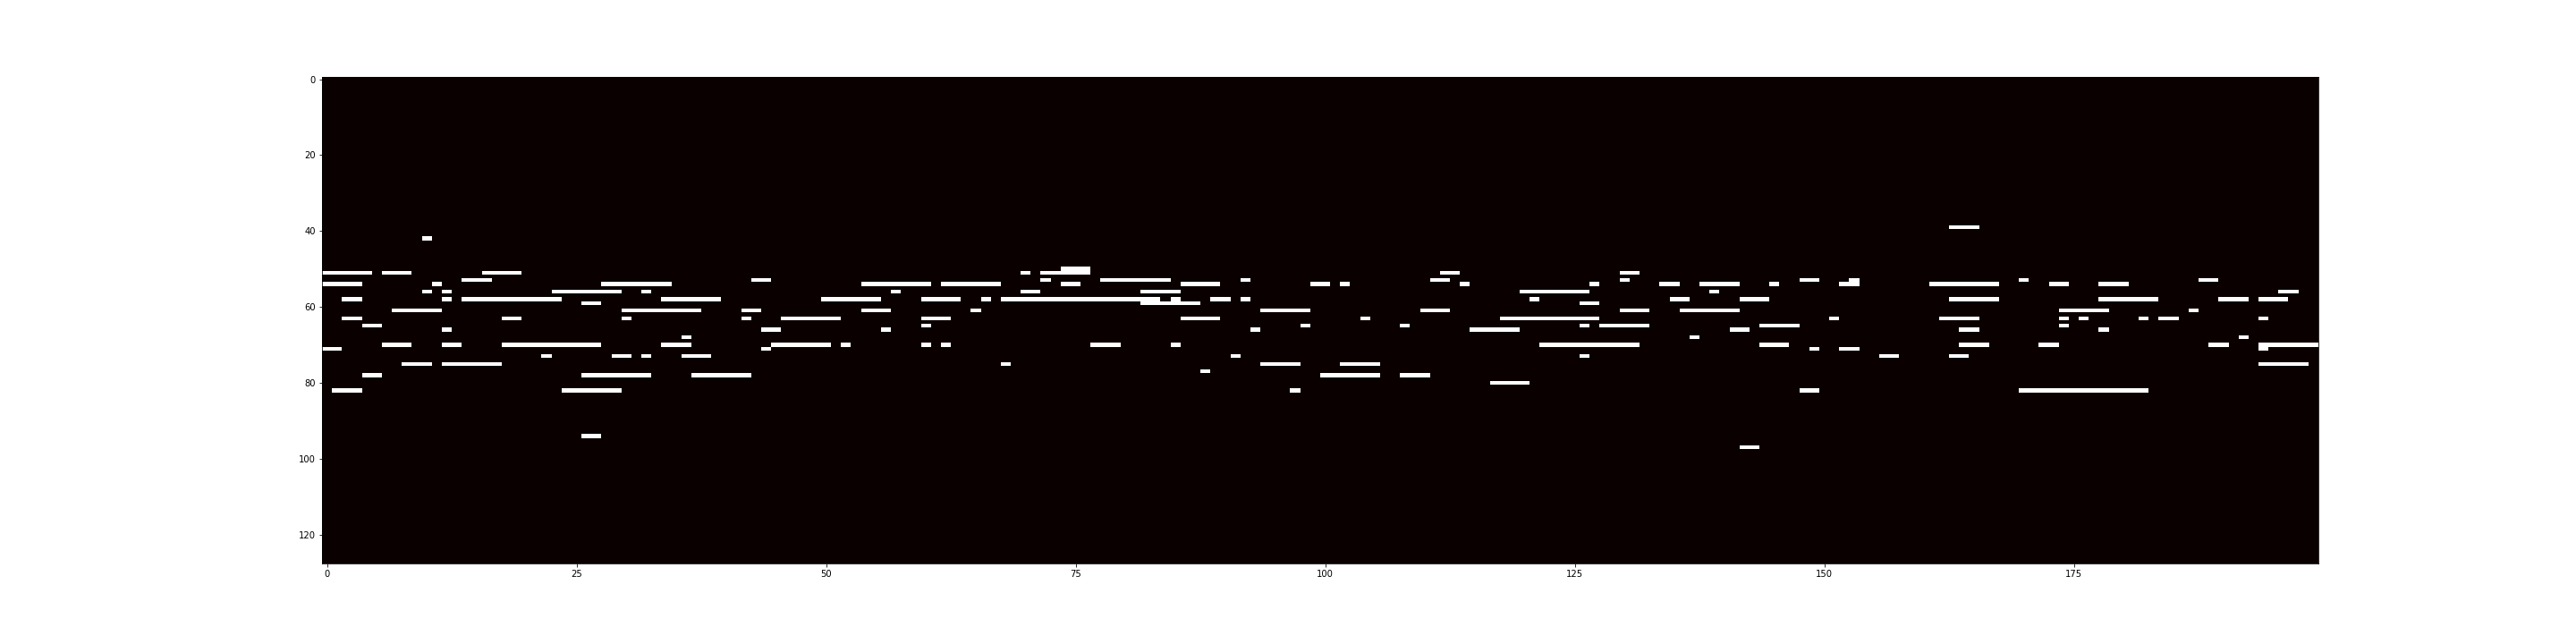

In [17]:
Image("plots/Exp5_note_hold__31beats__predicted_15_0dot01_3_1_1_128_31__12-21-2021_17-35-38.png")

## Experiment: Big vs small batch size

In [19]:
print("Exp 5 predicting with single batch size")
exp.common_config["num_beats_for_prediction"] = 31
exp.common_config["batch_size"] = 1
exp.run()
exp.predict_and_save_data("_batch_1_")
exp.common_config["batch_size"] = 50
exp.run()
exp.predict_and_save_data("_batch_50_")

Exp 5 predicting with single batch size
in get_model self is <src.models.basic_rnn.RNNMusicExperimentFive object at 0x7f47d0470668>
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_18 (LSTM)               (None, 128, 50)           20800     
_________________________________________________________________
lstm_19 (LSTM)               (None, 128, 50)           20200     
_________________________________________________________________
lstm_20 (LSTM)               (None, 128, 50)           20200     
_________________________________________________________________
dense_6 (Dense)              (None, 128, 2)            102       
Total params: 61,302
Trainable params: 61,302
Non-trainable params: 0
_________________________________________________________________


/home/ecbm4040/envTF24/lib/python3.6/site-packages/pretty_midi/pretty_midi.py:101: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  RuntimeWarning)


Training...
Epoch 1/3
1206/1206 [==============================] - 15s 10ms/step - loss: 0.0763 - mse: 0.0176
Epoch 2/3
1206/1206 [==============================] - 12s 10ms/step - loss: 0.0430 - mse: 0.0107
Epoch 3/3
1206/1206 [==============================] - 12s 10ms/step - loss: 0.0395 - mse: 0.0101
Predicting data...
Saving data...
Predicting data...
Saving data...
in get_model self is <src.models.basic_rnn.RNNMusicExperimentFive object at 0x7f47d0470668>
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_21 (LSTM)               (None, 128, 50)           20800     
_________________________________________________________________
lstm_22 (LSTM)               (None, 128, 50)           20200     
_________________________________________________________________
lstm_23 (LSTM)               (None, 128, 50)           20200     
__________________________________________________

/home/ecbm4040/envTF24/lib/python3.6/site-packages/pretty_midi/pretty_midi.py:101: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  RuntimeWarning)


Training...
Epoch 1/3
25/25 [==============================] - 4s 21ms/step - loss: 0.2387 - mse: 0.0709
Epoch 2/3
25/25 [==============================] - 0s 14ms/step - loss: 0.0891 - mse: 0.0176
Epoch 3/3
25/25 [==============================] - 0s 14ms/step - loss: 0.0850 - mse: 0.0171
Predicting data...
Saving data...
Predicting data...
Saving data...


## Analysis of number of beats used for prediction

As shown below the larger batch size fails to learn useful patterns. 

## Batch Size = 50

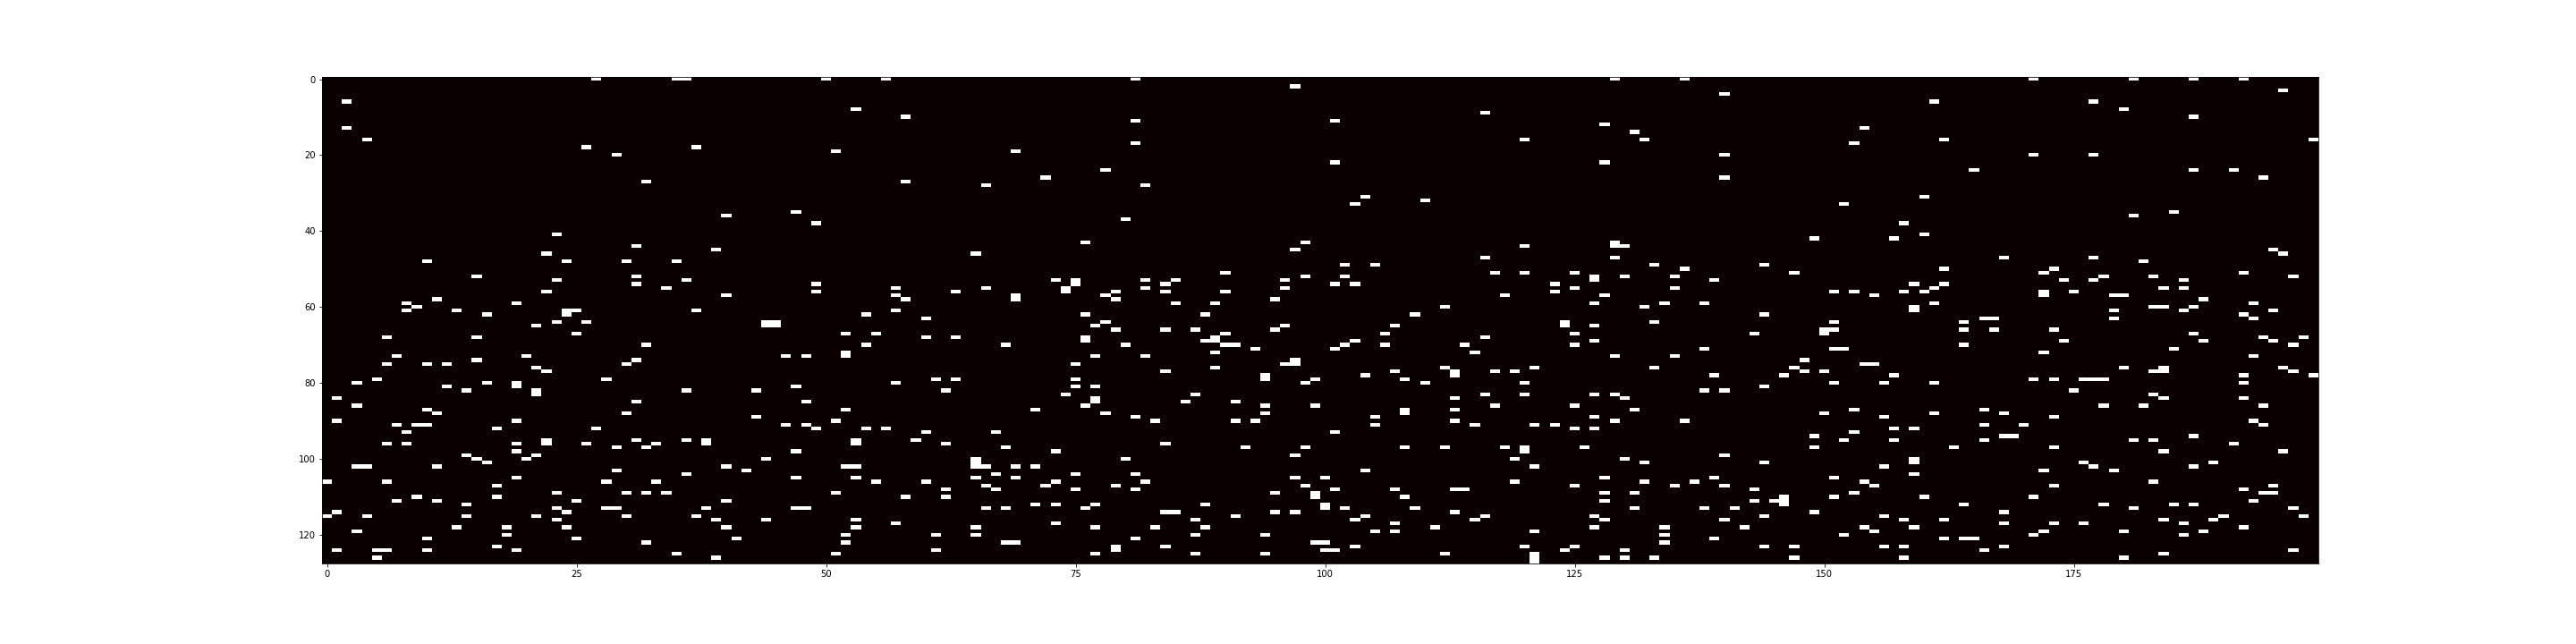

In [22]:
Image("plots/Exp5_note_hold__batch_50__predicted_15_0dot01_3_50_1_128_31__12-21-2021_18-14-28.png")

## Batch Size = 1

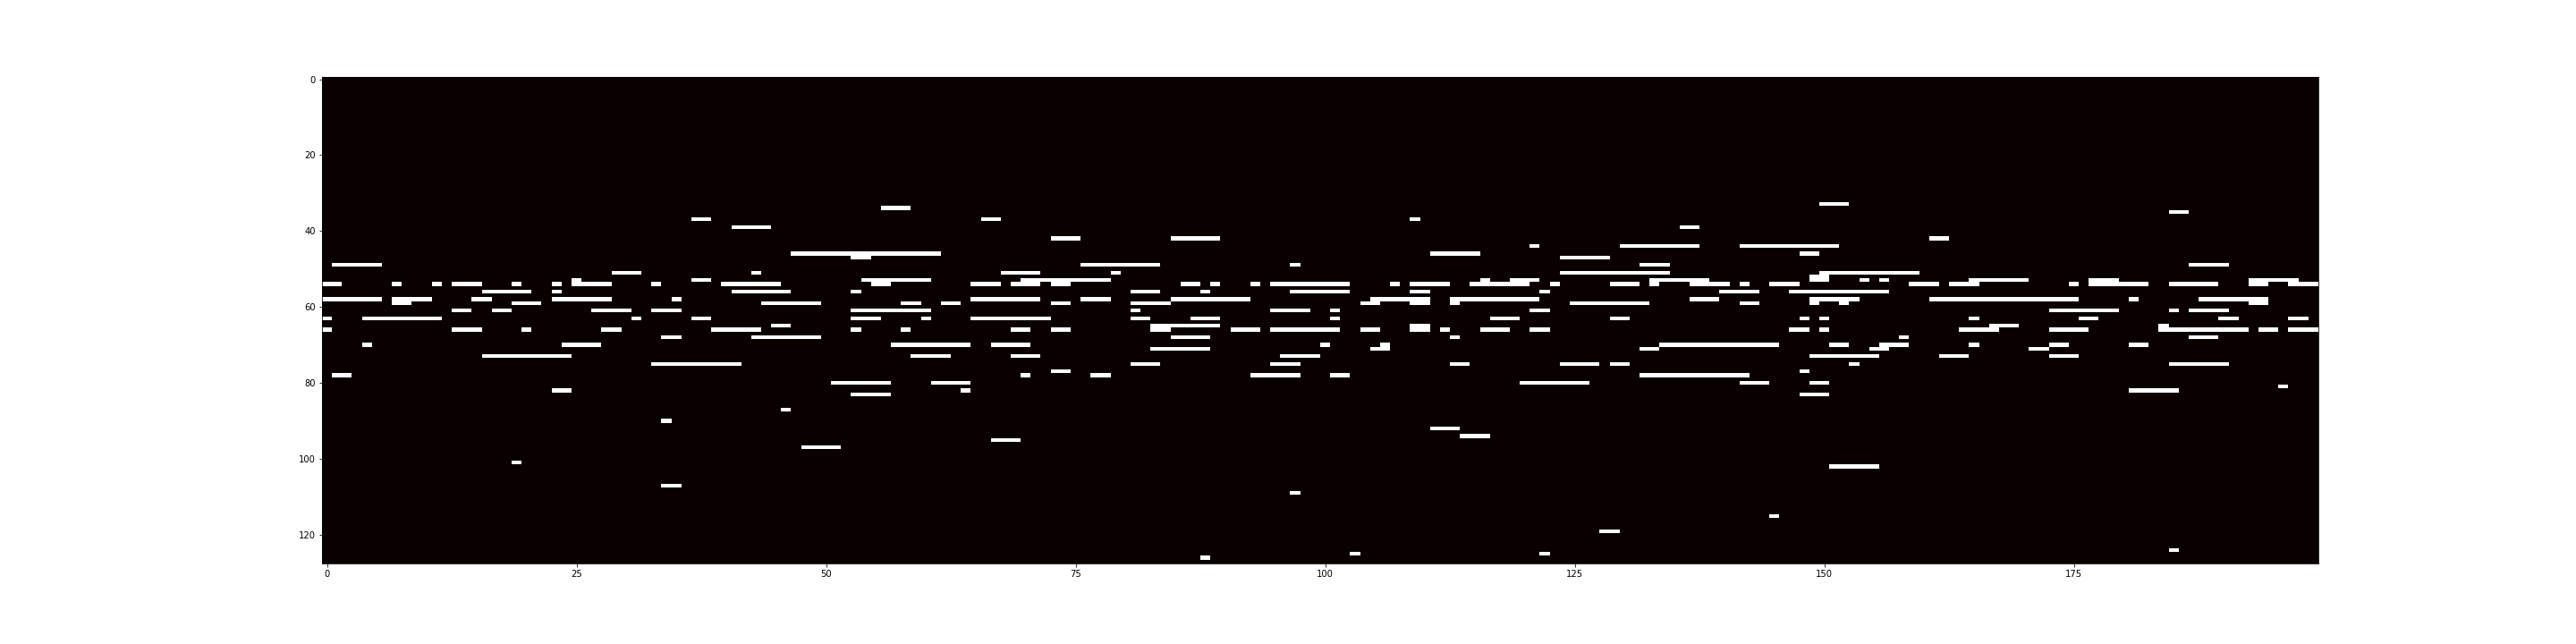

In [23]:
Image("plots/Exp5_note_hold__batch_1__predicted_15_0dot01_3_1_1_128_31__12-21-2021_18-13-55.png")

Experiment 5
in get_model self is <src.models.basic_rnn.RNNMusicExperimentFive object at 0x7f8845bc7fd0>
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 128, 50)           20800     
_________________________________________________________________
lstm_4 (LSTM)                (None, 128, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 128, 50)           20200     
_________________________________________________________________
dense_1 (Dense)              (None, 128, 2)            102       
Total params: 61,302
Trainable params: 61,302
Non-trainable params: 0
_________________________________________________________________


/home/ecbm4040/envTF24/lib/python3.6/site-packages/pretty_midi/pretty_midi.py:101: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  RuntimeWarning)


Training...
1206/1206 [==============================] - 15s 10ms/step - loss: 0.0711 - mse: 0.0160
Predicting data...
Saving data...
Exp 5 predicting with 31 beats
Predicting data...
Saving data...


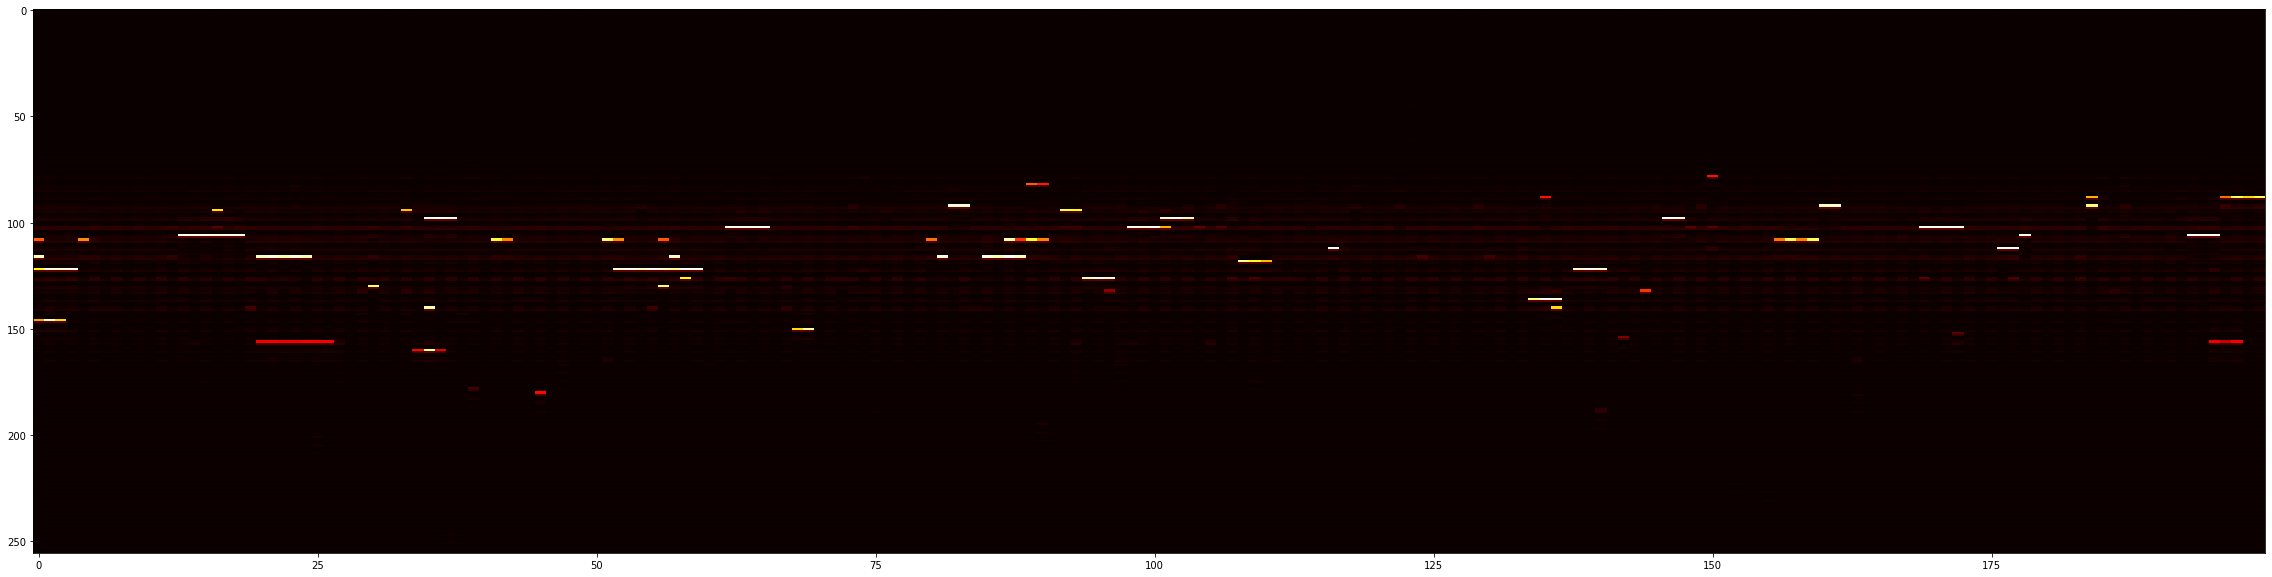

In [11]:
print("Experiment 5")
exp5 = brnn.RNNMusicExperimentFive(
    learning_rate=0.01,
    epochs=1,
    batch_size=1,
    num_music_files=1
)
exp5.run()
print("Exp 5 predicting with 31 beats")
exp5.common_config["num_beats_for_prediction"] = 31
exp5.predict_and_save_data()

In [12]:
!ls audio/RNNMusicExperimentFive_music_15_0dot01_3_1_1_128_312-21-2021_03-33-11.wav

audio/RNNMusicExperimentFive_music_15_0dot01_3_1_1_128_312-21-2021_03-33-11.wav


## Evaluation of Different Models

In [15]:
histories = []
history_labels = []
parameter = "loss"

histories.append(exp1.get_history())
# histories.append(exp2.get_history())
# histories.append(exp3.get_history())
histories.append(exp4.get_history())
histories.append(exp5.get_history())
histories.append(exp6.get_history())

history_labels.append("exp1")
# history_labels.append("exp2")
# history_labels.append("exp3")
history_labels.append("exp4")
history_labels.append("exp5")
history_labels.append("exp6")

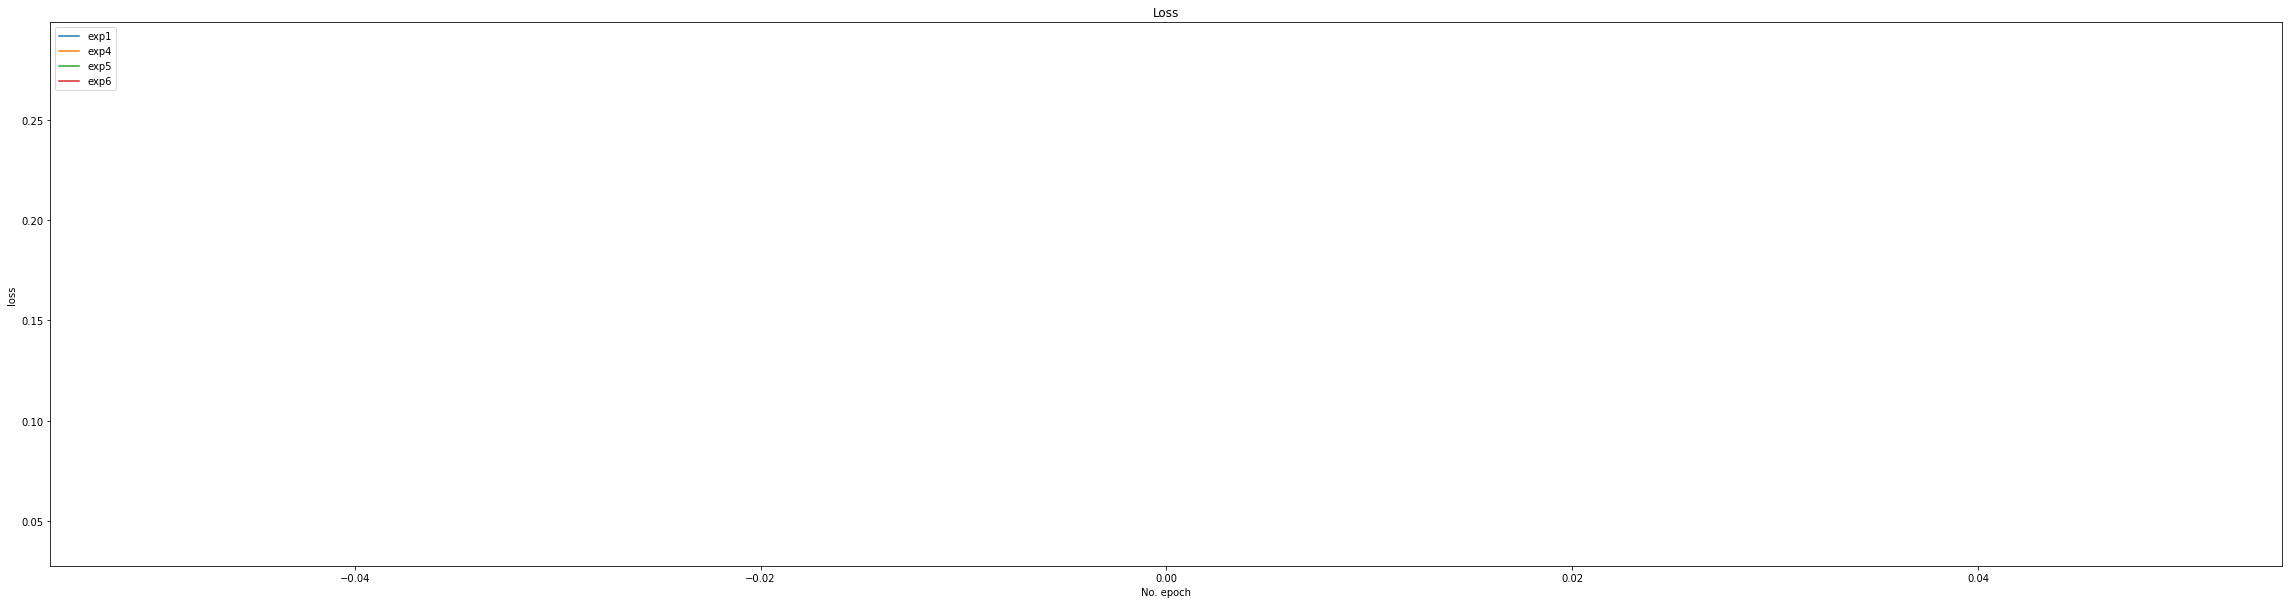

In [16]:
plot_histories(histories, history_labels, parameter)

In [ ]:
#TODO: Predict 30s with each experiment
#TODO: Implement function for RNNExperiment to turn prediction into midi_file
#TODO: Write getter function for output pretty midi of RNNExperiment
#TODO: Plot graph with all models
#TODO: Have predicted music files from each (optional)
#TODO: Write paragraph about what effect each change has